## Hedging - Part 1

In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [45]:
beg_date = '2016-01-01'
end_date = '2017-01-01'

In [46]:
asset = get_pricing('AAPL', fields='price', start_date=beg_date, end_date=end_date)

In [4]:
asset.head()

2016-01-04 00:00:00+00:00    103.038
2016-01-05 00:00:00+00:00    100.465
2016-01-06 00:00:00+00:00     98.508
2016-01-07 00:00:00+00:00     94.439
2016-01-08 00:00:00+00:00     94.869
Freq: C, Name: Equity(24 [AAPL]), dtype: float64

In [47]:
benchmark = get_pricing('SPY', fields='price', start_date=beg_date, end_date=end_date)

In [48]:
asset_ret = asset.pct_change(1)[1:]
benchmark_ret = benchmark.pct_change(1)[1:]

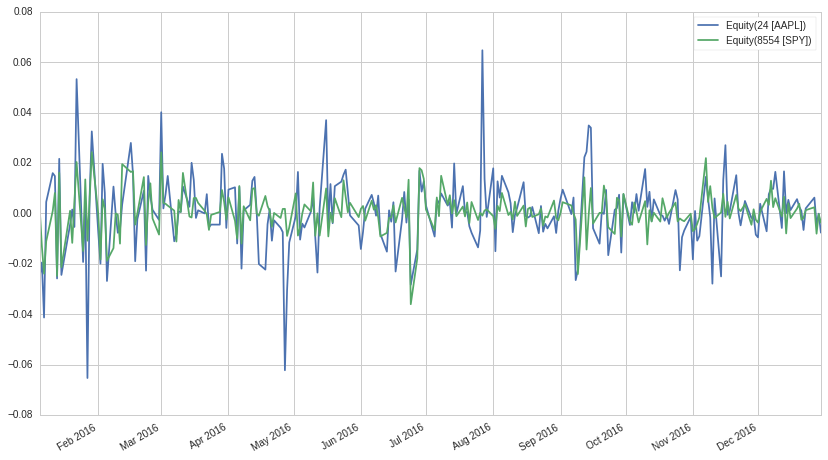

In [8]:
asset_ret.plot()
benchmark_ret.plot()
plt.legend()

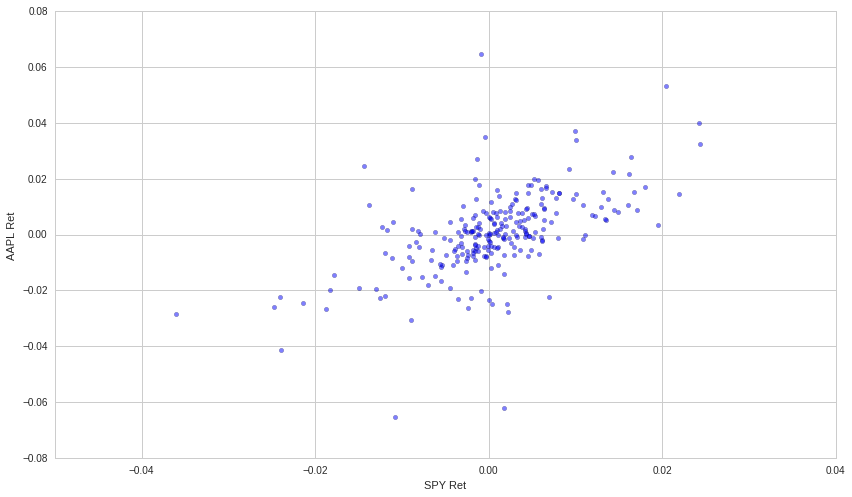

In [33]:
plt.scatter(benchmark_ret, asset_ret, alpha=0.5)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [10]:
# Just grab the values only no date/time association
AAPL = asset_ret.values
SPY = benchmark_ret.values

In [25]:
# printing AAPL results in a huge array printed out of numbers
# here's a filtered printout of AAPL to get a selected range only to save space
minm = -0.001
maxm = 0.001
def filter_array(stock):
    if(stock >= minm and stock <= maxm):
        return True
    else:
        return False
    
filteredStocks = filter(filter_array, AAPL)

for num in filteredStocks:
    print(num)

-0.000107012531167
0.00079503255608
0.000593286808921
0.0
0.000535409633744
0.000762951094835
-0.000795016554459
-0.000908135465241
-0.000204591022546
0.000303659092059
0.000597014925373
-0.000642171096716
-0.000279902966971
0.000354138999557
-0.000177006814762
0.000355767434828
-0.000674988678987
-0.000854993160055
-0.000858207033865
0.00098268136782
-0.000545404963185
0.000268504430323
-0.000985928116877
8.68130914142e-05
-8.56604420078e-05


In [26]:
# adds a constant value to get intercept value
spy_constant = sm.add_constant(SPY)

In [27]:
model = regression.linear_model.OLS(AAPL, spy_constant).fit()

In [28]:
model.params

array([  1.67990248e-05,   1.02981370e+00])

In [29]:
alpha, beta = model.params

In [30]:
alpha

1.6799024809993564e-05

In [31]:
beta

1.0298136979465768

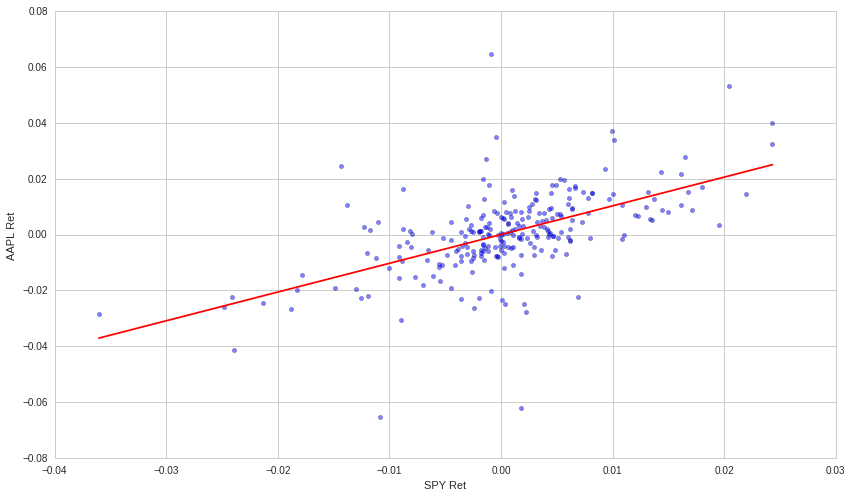

In [34]:
min_spy = benchmark_ret.values.min()
max_spy = benchmark_ret.values.max()

spy_line = np.linspace(min_spy, max_spy, 100)

y = spy_line * beta + alpha

plt.plot(spy_line, y, c='r')
plt.scatter(benchmark_ret, asset_ret, alpha=0.5)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [35]:
# the first part is to cancel out the market component of beta by multiplying by -1
hedged = -1 * (benchmark_ret * beta) + asset_ret

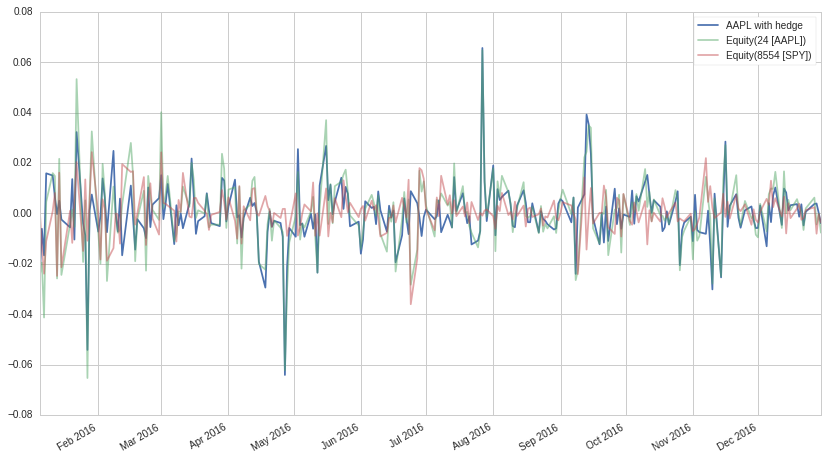

In [36]:
hedged.plot(label='AAPL with hedge')
asset_ret.plot(alpha=0.5)
benchmark_ret.plot(alpha=0.5)
plt.legend()

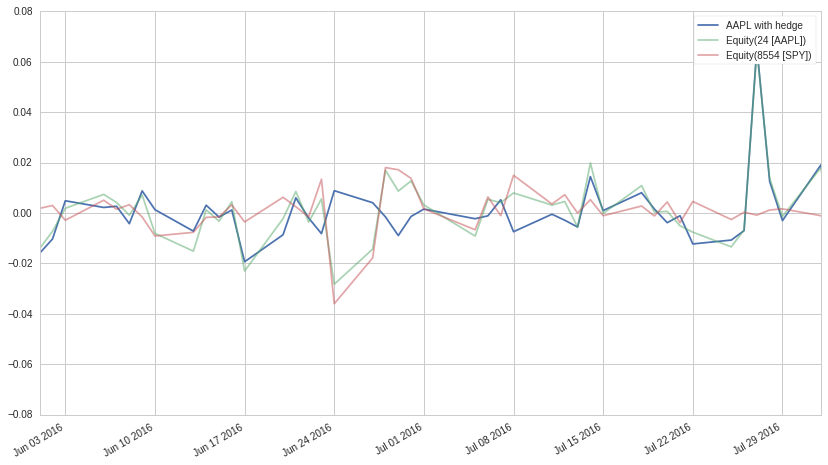

In [37]:
# zoom in to a particular period to show that the hedged AAPL stock did not drop
# at the end of June unlike AAPL and SPY
# the 3rd week of July, the move by AAPL and hedged AAPL were in tandem because it was alpha not beta
hedged.plot(label='AAPL with hedge')
asset_ret.plot(alpha=0.5)
benchmark_ret.plot(alpha=0.5)
plt.xlim(['2016-06-01', '2016-08-01'])
plt.legend()

## Hedging - Part 2

In [38]:
# make a function that was previously spread out across multiple lines
def alpha_beta(bench_return, stock):
    benchmark = sm.add_constant(bench_return)
    model = regression.linear_model.OLS(stock, benchmark).fit()
    return model.params[0], model.params[1]

In [50]:
# 2016 cell
beg_date = '2016-01-01'
end_date = '2017-01-01'

# asset prices
asset2016 = get_pricing('AAPL', fields='price', start_date=beg_date, end_date=end_date)
benchmark2016 = get_pricing('SPY', fields='price', start_date=beg_date, end_date=end_date)

# returns on assets
asset_ret2016 = asset2016.pct_change(1)[1:]
benchmark_ret2016 = benchmark2016.pct_change(1)[1:]

# this removes the timestamp information
aret_values = asset_ret2016.values
bret_values = benchmark_ret2016.values

# call function to get alpha and beta
alpha2016, beta2016 = alpha_beta(bret_values, aret_values)

print('2016 Values')
print('Alpha: ' +str(alpha2016))
print('Beta:  ' +str(beta2016))

2016 Values
Alpha: 1.679902481e-05
Beta:  1.02981369795


In [51]:
# create a portfolio object
portfolio = -1 * beta2016 * benchmark_ret2016 + asset_ret2016

In [52]:
alpha, beta = alpha_beta(benchmark_ret2016, portfolio)

In [53]:
print('Portfolio Alpha and Beta')
print('Alpha: ' +str(alpha))
print('Beta:  ' +str(beta))

Portfolio Alpha and Beta
Alpha: 1.679902481e-05
Beta:  1.36609473733e-16


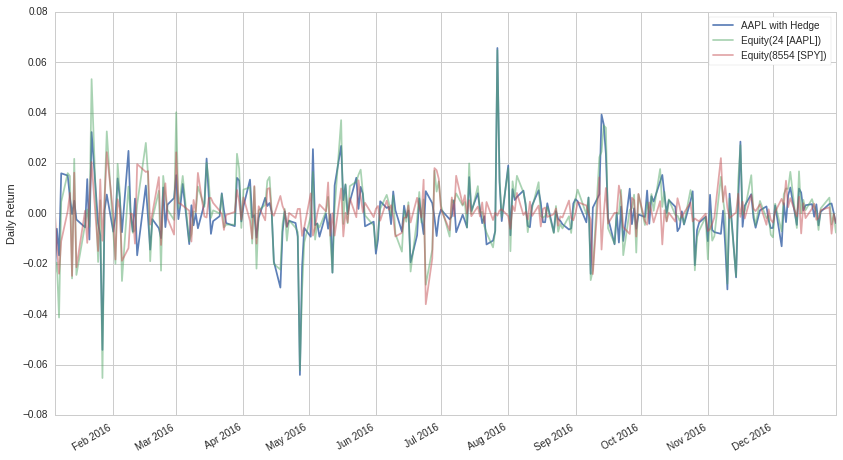

In [54]:
portfolio.plot(alpha=0.9, label='AAPL with Hedge')
asset_ret2016.plot(alpha=0.5)
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel('Daily Return')
plt.legend()

In [55]:
# average return on the portfolio is lower
portfolio.mean()

1.6799024809993652e-05

In [56]:
# average return on the stock
asset_ret2016.mean()

0.000574549568770769

In [57]:
# volatility on the portfolio is lower though
portfolio.std()

0.012065447808277703

In [58]:
asset_ret2016.std()

0.014702747344261722

In [59]:
# 2017 cell
beg_date = '2017-01-01'
end_date = '2018-01-01'

# asset prices
asset2017 = get_pricing('AAPL', fields='price', start_date=beg_date, end_date=end_date)
benchmark2017 = get_pricing('SPY', fields='price', start_date=beg_date, end_date=end_date)

# returns on assets
asset_ret2017 = asset2017.pct_change(1)[1:]
benchmark_ret2017 = benchmark2017.pct_change(1)[1:]

# this removes the timestamp information
aret_values = asset_ret2017.values
bret_values = benchmark_ret2017.values

# call function to get alpha and beta
alpha2017, beta2017 = alpha_beta(bret_values, aret_values)

print('2017 Values')
print('Alpha: ' +str(alpha2017))
print('Beta:  ' +str(beta2017))

2017 Values
Alpha: 0.000572942696746
Beta:  1.38560876067


In [60]:
portfolio = -1 * beta2016 * benchmark_ret2017 + asset_ret2017

In [61]:
alpha, beta = alpha_beta(benchmark_ret2017, portfolio)

In [62]:
alpha

0.00057294269674614982

In [63]:
# beta is no longer zero because an imperfect benchmark was used
beta

0.35579506272700379

In [64]:
portfolio.mean()

0.000845421207287768

In [65]:
asset_ret2017.mean()

0.0016340833669061569

In [66]:
portfolio.std()

0.009658212016325187

In [67]:
asset_ret2017.std()

0.011146544872591061